In [1]:
import datagen

In [2]:
import numpy as np
from matplotlib import pyplot as plt

import torch

In [3]:
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import train_test_split

In [4]:
import torch

In [5]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import matplotlib
def myplot(data,label,title=None):
    colors = ListedColormap(['red','blue'])
    plt.figure(figsize=(6,6))
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    scatterplot = plt.scatter(data[:,0],data[:,1],c=label,cmap=colors)
    plt.legend(handles=scatterplot.legend_elements()[0],labels=['class_0','class_1'])
    plt.title(title)
    plt.show()

In [6]:
def pred_plot(x,y,pred):
    class_plot = y + ~(pred==y)*2 
    plt.figure(figsize=(6,6))
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    colors_dict = {0:'red',1:'blue',2:'green',3:'orange'}
    colors = ListedColormap(['red','blue','green','orange'])
    scatter = plt.scatter(x[:,0],x[:,1],c=[colors_dict[i] for i in class_plot],cmap=colors,label=class_plot)
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='class_0',markerfacecolor='red', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='class_1',markerfacecolor='blue', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='class_0 miss',markerfacecolor='green', markersize=7),
                       Line2D([0], [0], marker='o', color='w', label='class_1 miss',markerfacecolor='orange', markersize=7)
                         ]

    plt.legend(handles=legend_elements)
    plt.show()

In [7]:
class model_kernel():
    def __init__(self,base_model,kenel):
        self.model = base_model
        self.kenel = kenel
    def predict(self,x):
        x = self.kenel(x)
        
        return self.model.predict(x)

In [8]:
def plot_decisionBoundary(model,data,label,plot_min=-6,plot_max=6):
    xx,yy = np.meshgrid(np.arange(plot_min,plot_max,0.05),np.arange(plot_min,plot_max,0.05))
    pred_db = model.predict(np.c_[xx.ravel(),yy.ravel()])
    colors = ListedColormap(['red','blue'])
    colors_db = ['pink','cyan']
    plt.figure(figsize=(7,7))
    plt.xlim(-6,6)
    plt.ylim(-6,6)
    plt.contourf(xx,yy,pred_db.reshape(xx.shape),cmap=matplotlib.colors.ListedColormap(colors_db))
    scatterplot = plt.scatter(data[:,0],data[:,1],c=label,cmap=colors)
    plt.legend(handles=scatterplot.legend_elements()[0],labels=['class_0','class_1'])
    plt.show()

In [9]:
class minimum_square():
    def __init__(self):
        None
    def train(self,x,y,lr=0.005):
        y_ = (y*2)-1
        Y = np.c_[y_,x]
        b = np.ones((len(Y),1))
        
        Y = torch.Tensor(Y)
        b = torch.Tensor(b)
        self.a = torch.rand((3,1),requires_grad=True)
        optimizer = torch.optim.Adam([self.a],lr=lr)
        
        for epoch in range(100):
            for i in range(len(Y)):
                loss = ((torch.matmul(Y[i],self.a)-b)**2).mean()
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            if epoch % 20 ==0:
                print("epoch ",epoch,", loss ",loss.item())
        #print("accuracy :",sum(((torch.Tensor(x)@self.a[1:])/self.a[0]>0).numpy().astype(int).reshape(-1)==y)/len(y))
    def predict(self,x):
        return ((torch.Tensor(x)@self.a[1:])/self.a[0]>0).numpy().astype(int).reshape(-1)

In [19]:
#1.mse
#2.linear svm
#3.kernel svm
def hw_pipe(x,y,kernel=None):
    #split data
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.5)
    #plot
    myplot(x,y,'Data')
    #mse
    mse = minimum_square()
    mse.train(x,y)
    pred = mse.predict(xtest)
    print("MSE acc : ",sum(pred==ytest)/len(ytest))
    pred_plot(xtest,ytest,pred)
    plot_decisionBoundary(mse,xtest,ytest)
    #linear svm
    svm = LinearSVC().fit(xtrain,ytrain)
    pred = svm.predict(xtest)
    print("Linear svm acc : ",sum(pred==ytest)/len(ytest))
    pred_plot(xtest,ytest,pred)
    plot_decisionBoundary(svm,xtest,ytest)
    #kernel
    if kernel is not None :
        if kernel == 'kernel_rbf':
            svm = SVC(kernel='rbf').fit(xtrain,ytrain)
            pred = svm.predict(xtest)
            print("Svm with kernel acc : ",sum(pred==ytest)/len(ytest))
            pred_plot(xtest,ytest,pred)
            plot_decisionBoundary(svm,xtest,ytest)
        else:
            xtrain_k = kernel(xtrain)
            svm = LinearSVC().fit(xtrain_k,ytrain)
            pred = svm.predict(kernel(xtest))
            print("Svm with kernel acc : ",sum(pred==ytest)/len(ytest))
            pred_plot(xtest,ytest,pred)
            model = model_kernel(svm,kernel)
            plot_decisionBoundary(model,xtest,ytest)

In [20]:
x,y = datagen.gaussian()

In [21]:
mse = minimum_square()
mse.train(x,y)

epoch  0 , loss  0.001223937957547605
epoch  20 , loss  0.0019414303824305534
epoch  40 , loss  0.0019414303824305534
epoch  60 , loss  0.0019414303824305534
epoch  80 , loss  0.0019414303824305534


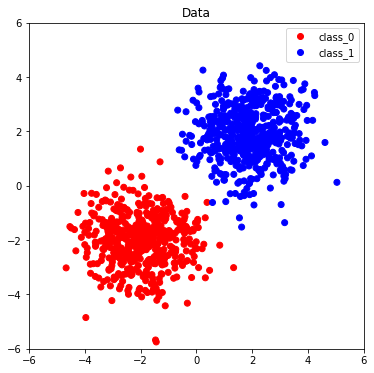

epoch  0 , loss  0.0006574409198947251
epoch  20 , loss  0.0019414303824305534
epoch  40 , loss  0.0019414303824305534
epoch  60 , loss  0.0019414303824305534
epoch  80 , loss  0.0019414303824305534
MSE acc :  1.0


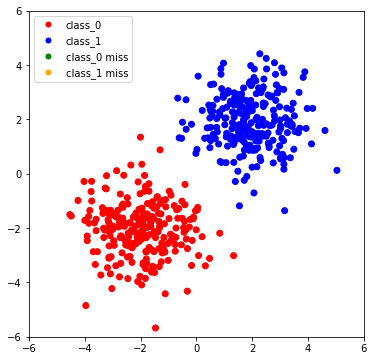

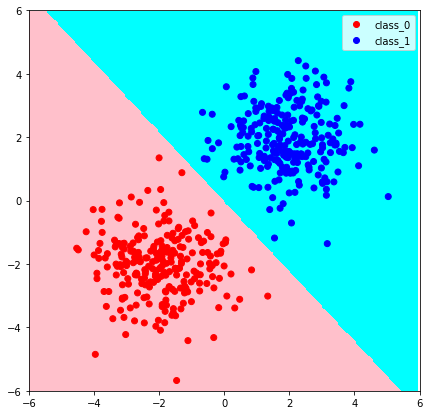

Linear svm acc :  1.0


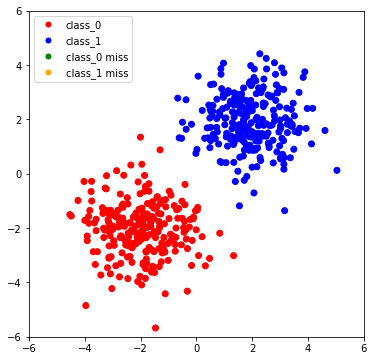

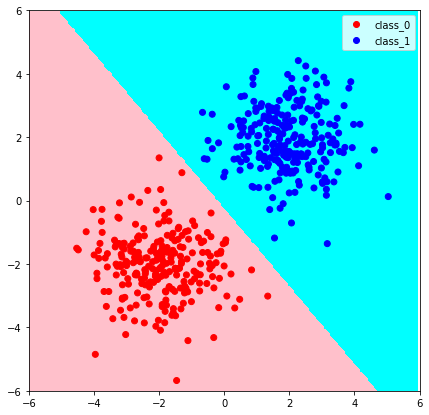

In [22]:
hw_pipe(x,y)

In [24]:
x,y = datagen.circular()

In [25]:
def kernel_sq(x):
    return x**2

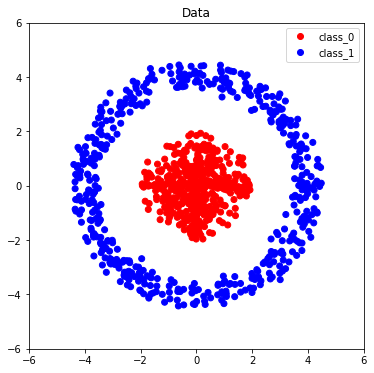

epoch  0 , loss  0.020138120278716087
epoch  20 , loss  0.004691226873546839
epoch  40 , loss  0.0046912189573049545
epoch  60 , loss  0.0046912189573049545
epoch  80 , loss  0.0046912189573049545
MSE acc :  0.494


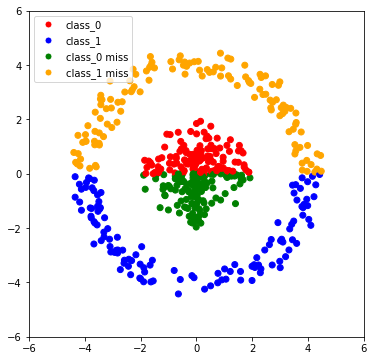

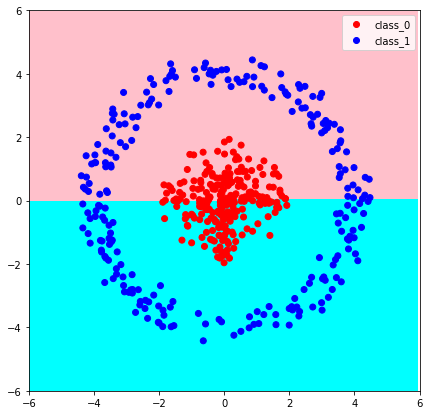

Linear svm acc :  0.448


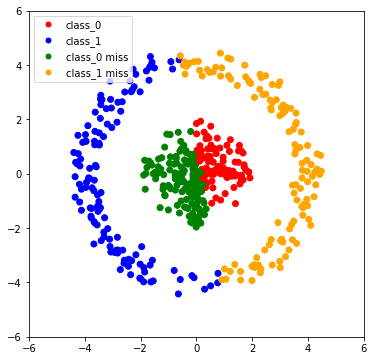

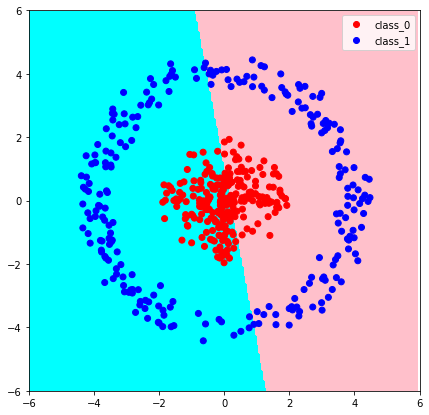

Svm with kernel acc :  1.0


/Users/layyer/anaconda3/envs/ptorch/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


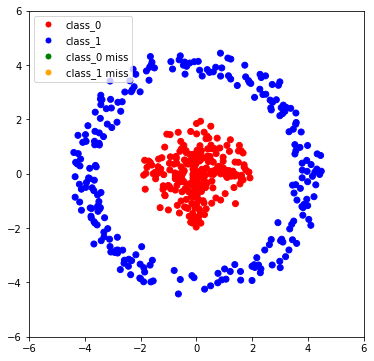

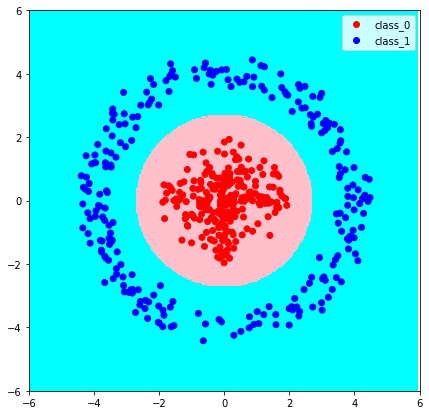

In [26]:
hw_pipe(x,y,kernel_sq)

In [27]:
x,y = datagen.xor()

In [28]:
def kernel_mul(x):
    return np.c_[x,x[:,0]*x[:,1]]

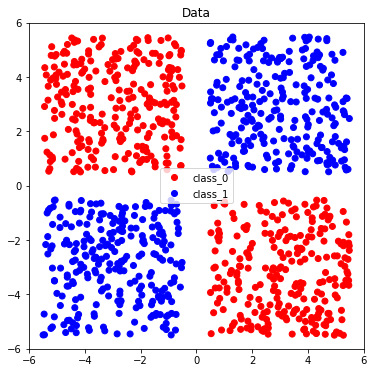

epoch  0 , loss  0.04060190171003342
epoch  20 , loss  0.03169192373752594
epoch  40 , loss  0.03169189766049385
epoch  60 , loss  0.03169192373752594
epoch  80 , loss  0.03169192373752594
MSE acc :  0.502


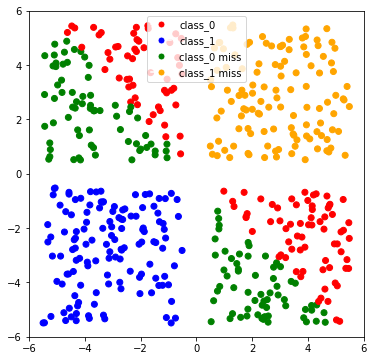

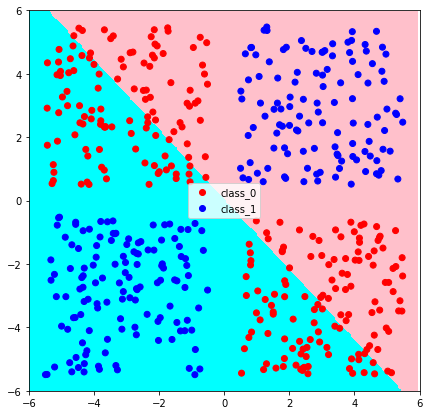

Linear svm acc :  0.446


/Users/layyer/anaconda3/envs/ptorch/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


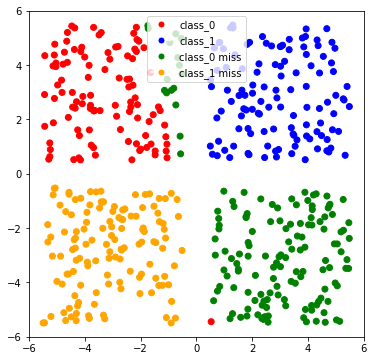

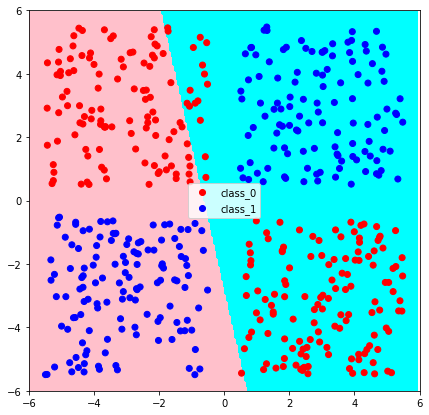

Svm with kernel acc :  1.0


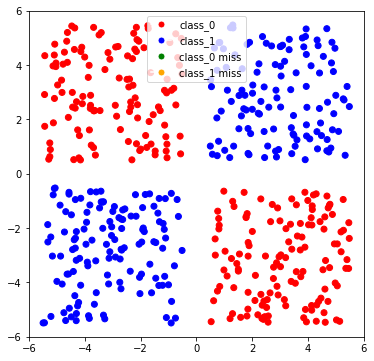

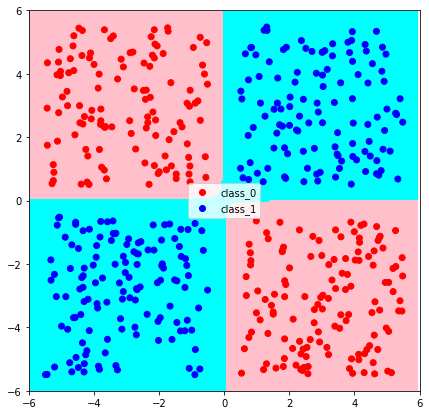

In [29]:
hw_pipe(x,y,kernel_mul)

In [30]:
x,y = datagen.spiral()

In [31]:
from sklearn.metrics.pairwise import rbf_kernel

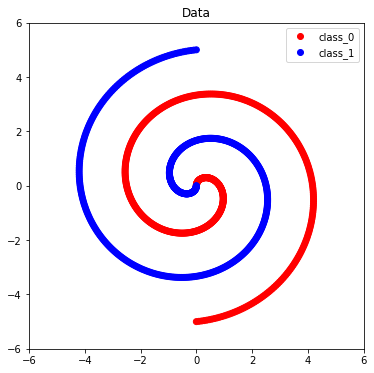

epoch  0 , loss  0.08728554099798203
epoch  20 , loss  0.19129297137260437
epoch  40 , loss  0.19129420816898346
epoch  60 , loss  0.19129420816898346
epoch  80 , loss  0.19129420816898346
MSE acc :  0.638


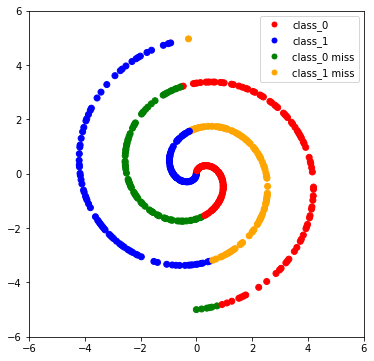

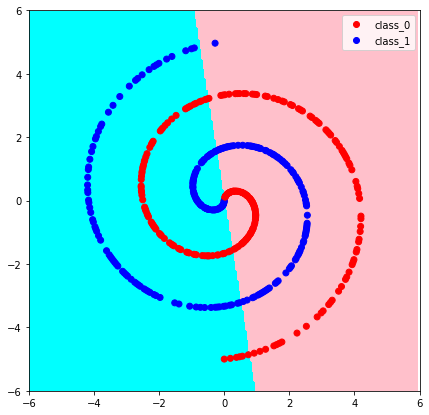

Linear svm acc :  0.64


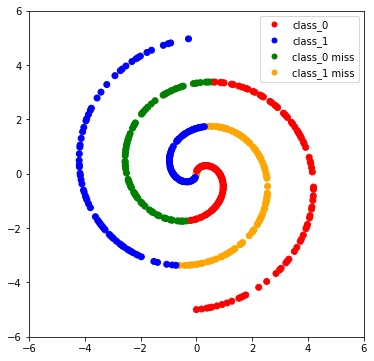

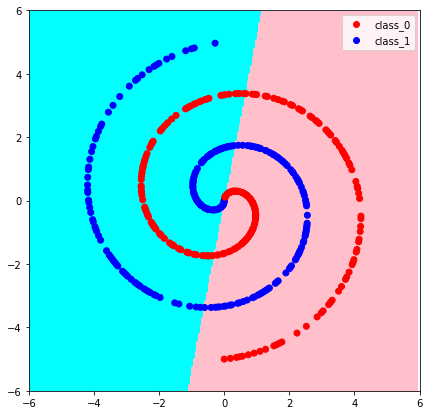

Svm with kernel acc :  0.86


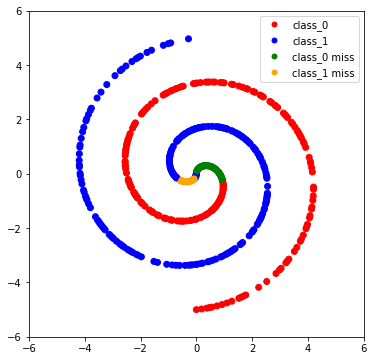

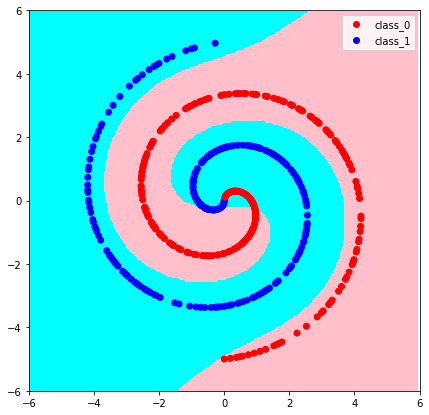

In [32]:
hw_pipe(x,y,'kernel_rbf')